<h1 style='text-align:center'>GBPUSD Profiling</h1>
The Judas swing term was named by <a href="https://www.youtube.com/channel/UCtjxa77NqamhVC8atV85Rog">The Inner Circle Trader</a>, the idea is, the market makers will rally or sell price, normally just above or below a key level tricking buyers or sellers into the market to follow its direction. As the Judas swing high or low is formed, price is quickly reversed either taking out stops and or leaving traders out of the game. In simpler words, the judas swing is the "False Run" that trips up traders that lack the understanding of the true direction of the day. The underlying idea is that if the market is bullish then market makers will send the price lower first to get a better price and then move it in the bullish direction. 
<br></br>
<p style='text-align:center'> <b> The focus of this analysis is to "profile" the GBPUSD trading pair to provide information that could better help with trading.</b></p>

<h2> 0. Loading the TradingView Data </h2>
It is important that when downloading data from TradingView that there aren't any indicators on the charts. Indicators will add new columns to the dataframe when importing data. Additionally the data that was downloaded for this project was downloading using ISO Time. 

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [371]:
#Weekly Data Starts on Sunday
weekly = pd.read_csv("FOREXCOM_GBPUSD, 1W.csv", index_col = "time", parse_dates=True)
weekly.rename(columns={'open':'Wopen','high':'Whigh','low':'Wlow', 'close':'Wclose'}, inplace = True)

#Daily Data Merges Friday Data into Thursday
daily = pd.read_csv("FOREXCOM_GBPUSD, 1D.csv", index_col = "time", parse_dates=True)
daily.rename(columns={'open':'Dopen','high':'Dhigh','low':'Dlow', 'close':'Dclose'}, inplace = True)

<b>NOTE: The data from trading view is in GMT and not in your local time. For example, I'm in GMT-5 (New York) time so what is considered "Sunday" for me is actually Sunday 17:00 to Monday 17:00 in my local time.</b>
   
<p style='text-align:center'><i>I will be looking through the lens of US/Eastern time </i></p>

In [372]:
weekly.index = weekly.index.tz_convert('US/Eastern')

In [373]:
weekly.head()

,Wopen,Whigh,Wlow,Wclose
time,,,,
2013-01-27 17:00:00-05:00,1.57616,1.58784,1.56746,1.56944
2013-02-03 17:00:00-05:00,1.56944,1.58447,1.56307,1.58015
2013-02-10 17:00:00-05:00,1.58015,1.58101,1.54618,1.55056
2013-02-17 17:00:00-05:00,1.55056,1.55097,1.50717,1.50760
2013-02-24 17:00:00-05:00,1.50760,1.52221,1.49858,1.50450


In [374]:
weekly.index.min(), weekly.index.max()

(Timestamp('2013-01-27 17:00:00-0500', tz='US/Eastern'),
 Timestamp('2020-05-10 17:00:00-0400', tz='US/Eastern'))

In [375]:
daily.index = daily.index.tz_convert('US/Eastern')

In [376]:
daily.head()

,Dopen,Dhigh,Dlow,Dclose
time,,,,
2014-01-09 17:00:00-05:00,1.64810,1.65171,1.63820,1.64807
2014-01-11 17:00:00-05:00,1.64807,1.64876,1.64807,1.64859
2014-01-12 17:00:00-05:00,1.64859,1.65080,1.63473,1.63827
2014-01-13 17:00:00-05:00,1.63827,1.64646,1.63678,1.64399
2014-01-14 17:00:00-05:00,1.64399,1.64442,1.63225,1.63708


In [377]:
daily.index.min(), daily.index.max()

(Timestamp('2014-01-09 17:00:00-0500', tz='US/Eastern'),
 Timestamp('2020-05-14 17:00:00-0400', tz='US/Eastern'))

<br />
<p style='text-align:center'>There is weekly price data from January 2013 - May 2020 and daily price data from January 2014 - May 2020. </p>

<h2>1. What Day Does the Weekly Low/High Occur?</h2>
Assuming the Judas Swing idea is accurate then if we anticipate the week to be bullish, then the price should go down before it goes up.

<h4>Determine What Week the Date is In</h4>

In [378]:
weekly["Week Number"]= weekly.index.strftime('%Y-%U')

In [379]:
daily["Week Number"] = daily.index.strftime('%Y-%U')

<h4>Merge the Dataframes on the Week Number</h4>

In [380]:
daily_weekly = daily.reset_index().merge(weekly, on="Week Number").set_index("time")

In [381]:
daily_weekly.head()

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose
time,,,,,,,,,
2014-01-09 17:00:00-05:00,1.64810,1.65171,1.63820,1.64807,2014-01,1.63981,1.65171,1.63373,1.64859
2014-01-11 17:00:00-05:00,1.64807,1.64876,1.64807,1.64859,2014-01,1.63981,1.65171,1.63373,1.64859
2014-01-12 17:00:00-05:00,1.64859,1.65080,1.63473,1.63827,2014-02,1.64859,1.65080,1.63097,1.64193
2014-01-13 17:00:00-05:00,1.63827,1.64646,1.63678,1.64399,2014-02,1.64859,1.65080,1.63097,1.64193
2014-01-14 17:00:00-05:00,1.64399,1.64442,1.63225,1.63708,2014-02,1.64859,1.65080,1.63097,1.64193


<h4>Determine if the Day Was the High or Low of the Week</h4>

In [382]:
def isBullBear(row):
    """
    Determines if the week was a bullish week or a bearish week 
    by comparing the weekly open and weekly close
    """
    if row['Wopen'] < row['Wclose']:
        return "Bull"
    else: 
        return "Bear"

In [383]:
def isLowHighEntry(row):
    """
    Determines if the day was the low of the week, when the week turned out to be bullish
    or
    If the day was the high of the week, when the week turned out to be bearish
    """
    if row['Wopen'] <= row['Wclose']: #Bullish Case
        if row['Dlow'] == row['Wlow']:
            return 1
        else:
            return 0
    else: #Bearish Case
        if row['Dhigh'] == row['Whigh']:
            return 1
        else:
            return 0

In [384]:
daily_weekly["Bull/Bear"] = daily_weekly.aggregate(isBullBear, axis='columns')
daily_weekly['Low/High-Entry'] = daily_weekly.aggregate(isLowHighEntry, axis='columns')

In [385]:
daily_weekly.head()

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose,Bull/Bear,Low/High-Entry
time,,,,,,,,,,,
2014-01-09 17:00:00-05:00,1.64810,1.65171,1.63820,1.64807,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0
2014-01-11 17:00:00-05:00,1.64807,1.64876,1.64807,1.64859,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0
2014-01-12 17:00:00-05:00,1.64859,1.65080,1.63473,1.63827,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,1
2014-01-13 17:00:00-05:00,1.63827,1.64646,1.63678,1.64399,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
2014-01-14 17:00:00-05:00,1.64399,1.64442,1.63225,1.63708,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0


<p style='text-align:center'><b>Now that the data is in place, we can ignore the specific dates and focus only on what day of the week it was.</b></p>

In [386]:
no_dates_df = daily_weekly.reset_index()
no_dates_df['time']= no_dates_df['time'].dt.strftime("%A")
no_dates_df.set_index('time', inplace = True)

In [387]:
no_dates_df.head(10)

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose,Bull/Bear,Low/High-Entry
time,,,,,,,,,,,
Thursday,1.64810,1.65171,1.63820,1.64807,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0
Saturday,1.64807,1.64876,1.64807,1.64859,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0
Sunday,1.64859,1.65080,1.63473,1.63827,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,1
Monday,1.63827,1.64646,1.63678,1.64399,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Tuesday,1.64399,1.64442,1.63225,1.63708,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Wednesday,1.63708,1.63832,1.63150,1.63538,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Thursday,1.63538,1.64588,1.63097,1.64145,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Saturday,1.64145,1.64225,1.64145,1.64193,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0
Sunday,1.64193,1.64522,1.63958,1.64284,2014-03,1.64193,1.66683,1.63958,1.65045,Bull,1


<h4>Count Which Day of the Week Had the Most Low/High Data</h4>

In [388]:
no_dates_df.groupby('time').apply(sum).sort_values(by='Low/High-Entry', ascending = False)['Low/High-Entry']

time
Sunday       175
Monday        74
Wednesday     37
Tuesday       32
Thursday      12
Saturday       0
Name: Low/High-Entry, dtype: int64

<br />
Out of the 330 Weeks (~6.25 years) of data the (High if Bear)/(Low if Bull) of the Week appears mainly on Sunday 17:00 to Monday 17:00 (53%). However if we extend that to Tuesday at 17:00 then the chances that the (High if Bear)/(Low if Bull) already occured increases to 75%. Adding Tuesday 17:00 to Wednesday 17:00 the chances increase the chances to 85%. 

The downfall of this analysis is that the data is historical and already knew the nature of the week. When live trading, we can only "guess" whether the week will be bullish or bearish. If we are confident of the direction of the week using some other methods, then we now have a general idea of which day we can expect to see the Low/High form. 

<p style='text-align:center'><b>A Simple Strategy Implementing The Analysis:</b> Predict the direction of the week (bullish) - Enter a market buy trade at the Tuesday open with the lowest point of the current week as your stop loss. 

<h2>2. What Day Does the Opposite End Form</h2>
When making a trade, both the entry and the exit is important. In the last section I found were the lowest point was (in the bull case), in this section I will find on what day the high of the week (in the bull case) occurs.

In [389]:
def isLowHighExit(row):
    """
    Determines if the day was the high of the week, when the week turned out to be bullish
    or
    If the day was the low of the week, when the week turned out to be bearish
    """
    if row["Wopen"] < row["Wclose"]: #Bullish Case
        if row['Dhigh'] == row["Whigh"]:
            return 1
        else:
            return 0
    else: #Bearish Case
        if row["Dlow"] == row["Wlow"]:
            return 1
        else:
            return 0

In [390]:
no_dates_df["Low/High-Exit"] = no_dates_df.aggregate(isLowHighExit, axis='columns')

In [391]:
no_dates_df.groupby('time').apply(sum).sort_values(by='Low/High-Exit', ascending=False)['Low/High-Exit']

time
Thursday     179
Wednesday     76
Tuesday       37
Monday        26
Sunday         8
Saturday       4
Name: Low/High-Exit, dtype: int64

<br />
The majority of the time the Low/High in the direction of the run will happen on the last trading day of the week (Thursday 17:00 to Friday 17:00). About half of the time it apperas by Thursday 17:00. 

<h2>3. Does the Low & High Ever Occur on the Same Day?</h2>

In [392]:
def sameHighLow(row):
    if row['Dlow'] == row['Wlow'] and row['Dhigh'] == row['Whigh']: return 1
    else: return 0

In [393]:
no_dates_df['SameDayLH'] = no_dates_df.aggregate(sameHighLow, axis='columns')

In [394]:
no_dates_df.groupby('time').apply(sum).sort_values(by='SameDayLH', ascending=False)['SameDayLH']

time
Thursday     3
Monday       2
Tuesday      2
Sunday       1
Wednesday    1
Saturday     0
Name: SameDayLH, dtype: int64

<br />
It is very rare the the low and high appear on the same day (~3%). With such a low number of occurences over a 6.5+ year span, it is safe to make trades under the assumption that the low/high never occur on the same day.

Statistics Exploration Question: Now that I know that Weekly Highs/Low don't form on the same day: How can I use conditional probabilities to determine when the best days are for an entry and an exit for the simple strategy?

<h2>4. How Many Pips Does the Pair Move Daily?</h2>

In [395]:
daily_weekly["daily_range"] = (daily_weekly["Dhigh"] - daily_weekly['Dlow']) * 10000
daily_weekly["daily_range_100_ma"] = daily_weekly["daily_range"].rolling(window=100).mean()
daily_weekly.head()

,Dopen,Dhigh,Dlow,Dclose,Week Number,Wopen,Whigh,Wlow,Wclose,Bull/Bear,Low/High-Entry,daily_range,daily_range_100_ma
time,,,,,,,,,,,,,
2014-01-09 17:00:00-05:00,1.64810,1.65171,1.63820,1.64807,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0,135.1,NaN
2014-01-11 17:00:00-05:00,1.64807,1.64876,1.64807,1.64859,2014-01,1.63981,1.65171,1.63373,1.64859,Bull,0,6.9,NaN
2014-01-12 17:00:00-05:00,1.64859,1.65080,1.63473,1.63827,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,1,160.7,NaN
2014-01-13 17:00:00-05:00,1.63827,1.64646,1.63678,1.64399,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0,96.8,NaN
2014-01-14 17:00:00-05:00,1.64399,1.64442,1.63225,1.63708,2014-02,1.64859,1.65080,1.63097,1.64193,Bear,0,121.7,NaN


In [396]:
daily_weekly.daily_range_100_ma.describe()

count    1558.000000
mean      112.354119
std        24.174283
min        64.380000
25%        98.643000
50%       108.193000
75%       125.140250
max       178.079000
Name: daily_range_100_ma, dtype: float64

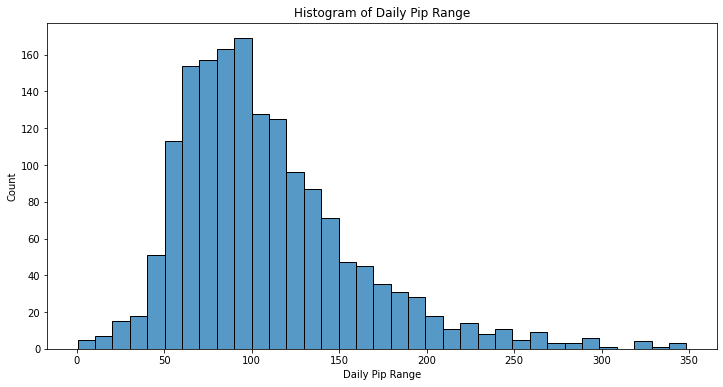

In [397]:
plt.figure(figsize=(12,6))
ax = sns.histplot(daily_weekly[daily_weekly.daily_range<350].daily_range);
ax.set(title='Histogram of Daily Pip Range', xlabel='Daily Pip Range', ylabel='Count');

You can expect GBPUSD to move AT LEAST 50 pips every day. Netting 50 pips a week on a 100K budget using no leverage can result in 24K a year. For the GBPUSD pair, getting 50 pips is a very conservative goal. However since the pair has a high daily pip range, if you are wrong then the trade can go against you aggresively.

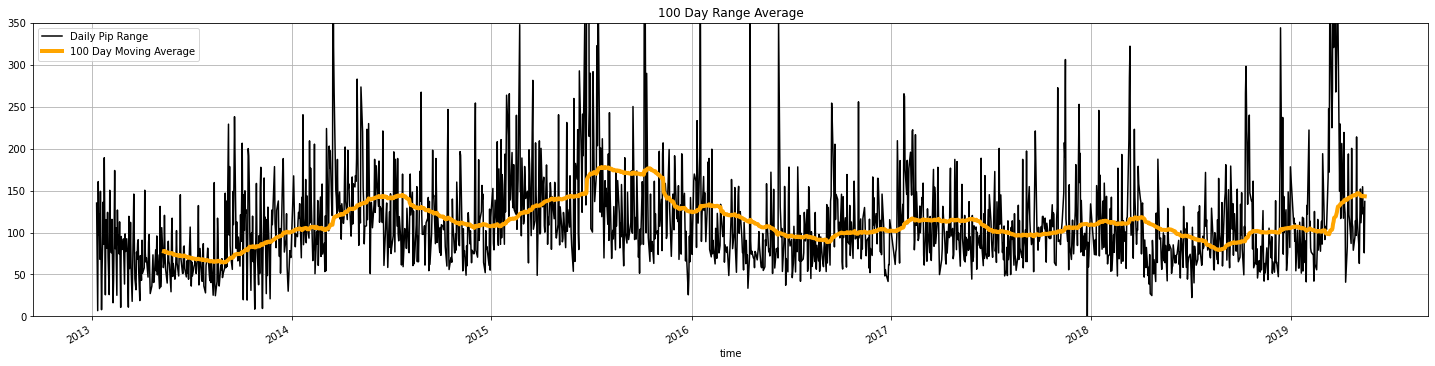

In [398]:
daily_weekly['daily_range'].plot(kind='line', label='Daily Pip Range', ylim=(0,350), color='black');
daily_weekly['daily_range_100_ma'].plot(kind='line', label='100 Day Moving Average',figsize=(25,6), title="100 Day Range Average", color='orange',linewidth=4, grid = True);
plt.legend(loc=0);

<p style='text-align:center'><i>Note: The limit on the y-axis is 350 which fits about 99% of the data</i></p>

<h2>5. How Many Pips is the Low to High of the Week?</h2>

In [399]:
daily_weekly["weekly_range"] = (daily_weekly["Whigh"] - daily_weekly['Wlow']) * 10000
daily_weekly["weekly_range_100_ma"] = daily_weekly["weekly_range"].rolling(window=100).mean()

In [400]:
daily_weekly.weekly_range.describe()

count    1657.000000
mean      266.795172
std       150.182071
min        77.000000
25%       187.200000
50%       230.500000
75%       312.400000
max      1789.600000
Name: weekly_range, dtype: float64

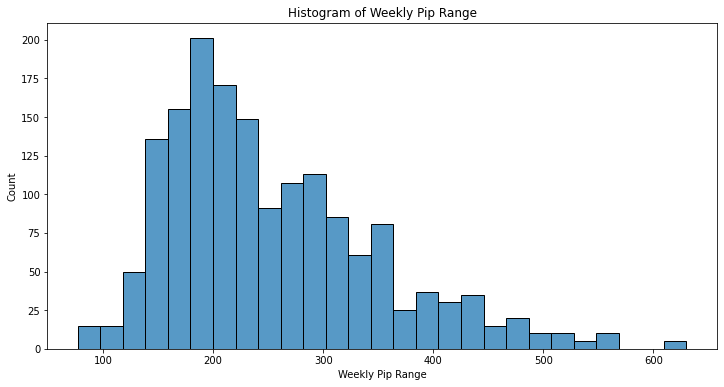

In [401]:
plt.figure(figsize=(12,6))
ax = sns.histplot(daily_weekly[daily_weekly.weekly_range<750].weekly_range);
ax.set(title='Histogram of Weekly Pip Range', xlabel='Weekly Pip Range', ylabel='Count');

The GBPUSD pair ranges 187 pips on the low end. There is a lot of breathing room when trying to extract out 50 pips from that range. The range and how much the pair "moves" are different things. Summing up the daily ranges for the week tells you how much the pair "moves" (<i>Summing up smaller timeframe ranges gives a more accurate representation</i>). We care about range because the idea is that we are trying to place one trade in the week in the direction of the weekly bias. Entering on the absolute low and exiting on the absolute high (if bullish) is extremely difficult. Entering and exiting in the middle of the run is more doable and by knowing the weekly range behavior we get a better sense of where we are enterin in the range. For example, if the trade moved 50 pips from the weekly low, then it is relatively safe to enter the trade since there is more room for the trade to run. 

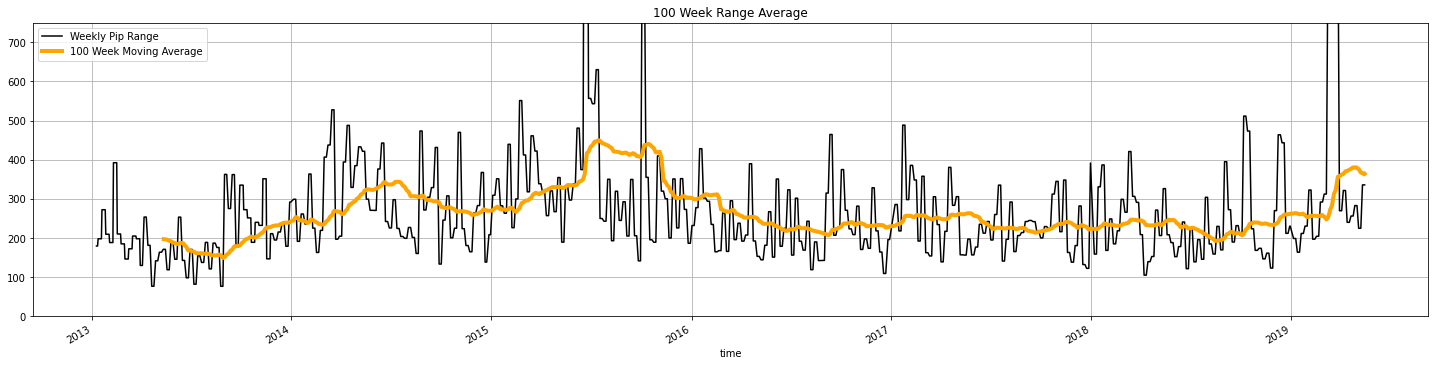

In [402]:
daily_weekly['weekly_range'].plot(kind='line', label='Weekly Pip Range', ylim=(0,750), color='black');
daily_weekly['weekly_range_100_ma'].plot(kind='line', label='100 Week Moving Average',figsize=(25,6), title="100 Week Range Average", color='orange',linewidth=4, grid = True);
plt.legend(loc=0);

<p style='text-align:center'><i>Note: The limit on the y-axis is 750 which fits about 98% of the data</i></p>

<h2>5. How Far Above/Below the Open Before the Move</h2>
The one price that is always known from the jump is the Weekly Open price. If there will be a drop in price before a bullish move it might be beneficial to know how low the drops are from the opening price.

In [403]:
ext5 = daily_weekly[daily_weekly["Low/High-Entry"] == 1]

In [404]:
def BeforeMove(row):
    if row['Bull/Bear'] == "Bull":
        return (row['Wopen'] - row['Wlow']) * 10000
    else:
        return (row['Whigh'] - row['Wopen']) * 10000

In [405]:
ext5['BeforeMove'] = ext5.aggregate(BeforeMove, axis='columns')
ext5['BeforeMove_27_ma'] = ext5['BeforeMove'].rolling(window=27).mean()

C:\Users\monke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\monke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


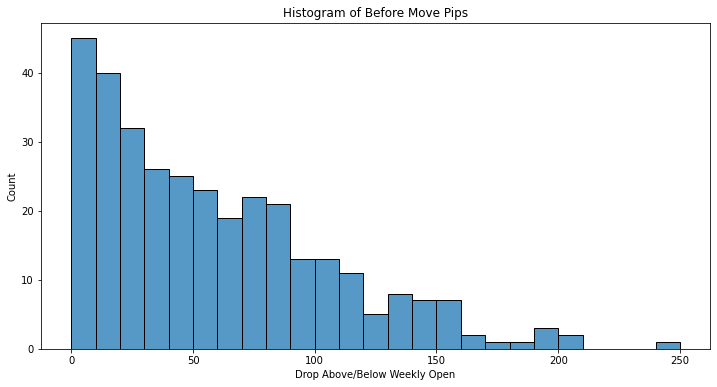

In [413]:
plt.figure(figsize=(12,6))
ax = sns.histplot(ext5[ext5.BeforeMove < 250].BeforeMove, binwidth=10);
ax.set(title='Histogram of Before Move Pips', xlabel='Drop Above/Below Weekly Open', ylabel='Count');

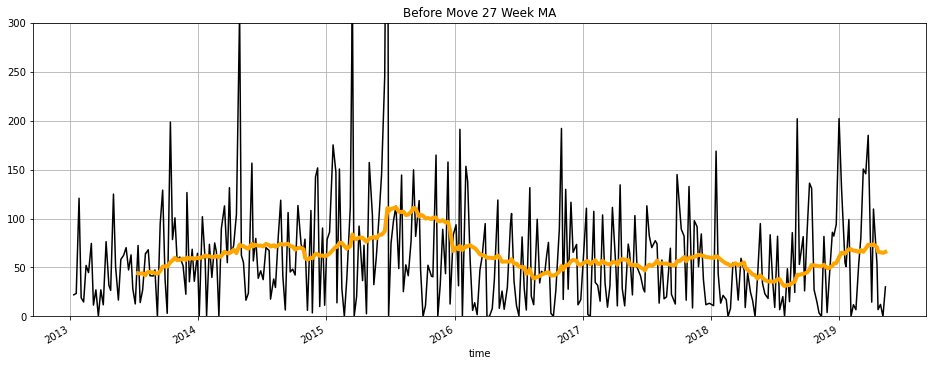

In [406]:
ext5['BeforeMove'].plot(kind='line',ylim=(0,300), color='black');
ext5['BeforeMove_27_ma'].plot(kind='line',grid=True,title="Before Move 27 Week MA", color='orange',linewidth=4, figsize=(16,6));

This could be useful if further analysis is done on the data. It seems that the opposite move prior to the main move fluctates above and below the 6-month moving average, but more analysis needs to be done on the data. 